In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
df=pd.read_csv("cardheko_cleaned.csv")
pd.set_option("display.max_column",100)
pd.set_option("display.max_row",500)
df

,centralVariantId,ft,km,transmission,ownerNo,owner,oem,bt,model,modelYear,variantName,Engine Type,price,city,Registration Year,Insurance Validity,Engine Displacement,Max Power,Torque,No of Cylinder,Mileage,Color,Seats,Length,Width,Height,Wheel Base,Steering Type,Drive Type,Cargo Volumn,price (lakh)
0,8654,Petrol,20000,Automatic,1,1st Owner,Kia,SUV,Kia Sonet,2022,Turbo DCT Anniversary Edition,Smartstream G1.0 T - GDi,₹ 11.50 Lakh,chennai,2022,Third Party,998,118.36,172.00,3.0,17.00,Black,5 Seats,3995,1790,1642,2500,Electric,FWD,392,11.50
1,4025,Petrol,20687,Manual,1,1st Owner,Maruti,Minivans,Maruti Eeco,2015,7 Seater Standard BSIV,In-Line Engine,₹ 4.15 Lakh,chennai,2015,Comprehensive,1196,73.00,101.00,4.0,15.37,Gray,7 Seats,3675,1475,1800,2350,Manual,RWD,540,4.15
2,8135,Petrol,30000,Manual,1,1st Owner,Nissan,SUV,Nissan Magnite,2021,Turbo XV Premium BSVI,HRA0 1.0 TURBO PETROL,₹ 7.50 Lakh,chennai,2021,Third Party,999,98.63,160.00,3.0,20.00,Others,5 Seats,3994,1758,1572,2500,Electric,FWD,336,7.50
3,1579,Petrol,59247,Manual,1,1st Owner,Hyundai,Hatchback,Hyundai i10,2015,Sportz 1.1L,IRDE2 Engine,₹ 3.98 Lakh,chennai,2015,Comprehensive,1086,68.05,99.04,4.0,19.81,Silver,5 Seats,3585,1595,1550,2380,Power,FWD,225,3.98
4,1341,Petrol,50000,Manual,1,1st Owner,Honda,Hatchback,Honda Jazz,2015,1.2 VX i VTEC,i-VTEC Petrol Engine,₹ 5.50 Lakh,chennai,2015,Third Party,1199,88.70,110.00,4.0,18.70,Others,5 Seats,3955,1694,1544,2530,Power,FWD,354,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,3823,Diesel,60000,Manual,1,1st Owner,Mahindra,SUV,Mahindra XUV500,2013,W8 2WD,mHawk Diesel Engine,₹ 7 Lakh,hyderabad,2013,Third Party,2179,140.00,330.00,4.0,15.10,Others,7 Seats,4585,1890,1785,2700,Power,FWD,418,7.00
8365,5007,Diesel,50000,Automatic,1,1st Owner,Jaguar,Sedan,Jaguar XF,2014,3.0 Litre S Premium Luxury,Diesel S Engine,₹ 20 Lakh,hyderabad,2014,Third Party,2993,270.90,600.00,6.0,14.74,Blue,5 Seats,4961,1877,1460,2909,Power,RWD,540,20.00
8366,250,Diesel,120000,Automatic,3,3rd Owner,BMW,Sedan,BMW 5 Series,2018,520d Luxury Line,TwinPower Turbo Inline 4 Cylinder Engine,₹ 35 Lakh,hyderabad,2018,Third Party,1995,187.74,400.00,4.0,20.37,Blue,5 Seats,4936,2126,1466,2975,Power,RWD,520,35.00
8367,6500,Diesel,50000,Automatic,2,2nd Owner,Tata,SUV,Tata Nexon,2019,1.5 Revotorq XMA,"Revotorq, 1.5L Turbocharged engine",₹ 8.50 Lakh,hyderabad,2019,Third Party,1497,108.50,260.00,4.0,21.50,Others,5 Seats,3994,1811,1607,2498,Power,FWD,350,8.50


In [4]:
df.drop_duplicates()

,centralVariantId,ft,km,transmission,ownerNo,owner,oem,bt,model,modelYear,variantName,Engine Type,price,city,Registration Year,Insurance Validity,Engine Displacement,Max Power,Torque,No of Cylinder,Mileage,Color,Seats,Length,Width,Height,Wheel Base,Steering Type,Drive Type,Cargo Volumn,price (lakh)
0,8654,Petrol,20000,Automatic,1,1st Owner,Kia,SUV,Kia Sonet,2022,Turbo DCT Anniversary Edition,Smartstream G1.0 T - GDi,₹ 11.50 Lakh,chennai,2022,Third Party,998,118.36,172.00,3.0,17.00,Black,5 Seats,3995,1790,1642,2500,Electric,FWD,392,11.50
1,4025,Petrol,20687,Manual,1,1st Owner,Maruti,Minivans,Maruti Eeco,2015,7 Seater Standard BSIV,In-Line Engine,₹ 4.15 Lakh,chennai,2015,Comprehensive,1196,73.00,101.00,4.0,15.37,Gray,7 Seats,3675,1475,1800,2350,Manual,RWD,540,4.15
2,8135,Petrol,30000,Manual,1,1st Owner,Nissan,SUV,Nissan Magnite,2021,Turbo XV Premium BSVI,HRA0 1.0 TURBO PETROL,₹ 7.50 Lakh,chennai,2021,Third Party,999,98.63,160.00,3.0,20.00,Others,5 Seats,3994,1758,1572,2500,Electric,FWD,336,7.50
3,1579,Petrol,59247,Manual,1,1st Owner,Hyundai,Hatchback,Hyundai i10,2015,Sportz 1.1L,IRDE2 Engine,₹ 3.98 Lakh,chennai,2015,Comprehensive,1086,68.05,99.04,4.0,19.81,Silver,5 Seats,3585,1595,1550,2380,Power,FWD,225,3.98
4,1341,Petrol,50000,Manual,1,1st Owner,Honda,Hatchback,Honda Jazz,2015,1.2 VX i VTEC,i-VTEC Petrol Engine,₹ 5.50 Lakh,chennai,2015,Third Party,1199,88.70,110.00,4.0,18.70,Others,5 Seats,3955,1694,1544,2530,Power,FWD,354,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3823,Diesel,60000,Manual,1,1st Owner,Mahindra,SUV,Mahindra XUV500,2013,W8 2WD,mHawk Diesel Engine,₹ 7 Lakh,hyderabad,2013,Third Party,2179,140.00,330.00,4.0,15.10,Others,7 Seats,4585,1890,1785,2700,Power,FWD,418,7.00
8365,5007,Diesel,50000,Automatic,1,1st Owner,Jaguar,Sedan,Jaguar XF,2014,3.0 Litre S Premium Luxury,Diesel S Engine,₹ 20 Lakh,hyderabad,2014,Third Party,2993,270.90,600.00,6.0,14.74,Blue,5 Seats,4961,1877,1460,2909,Power,RWD,540,20.00
8366,250,Diesel,120000,Automatic,3,3rd Owner,BMW,Sedan,BMW 5 Series,2018,520d Luxury Line,TwinPower Turbo Inline 4 Cylinder Engine,₹ 35 Lakh,hyderabad,2018,Third Party,1995,187.74,400.00,4.0,20.37,Blue,5 Seats,4936,2126,1466,2975,Power,RWD,520,35.00
8367,6500,Diesel,50000,Automatic,2,2nd Owner,Tata,SUV,Tata Nexon,2019,1.5 Revotorq XMA,"Revotorq, 1.5L Turbocharged engine",₹ 8.50 Lakh,hyderabad,2019,Third Party,1497,108.50,260.00,4.0,21.50,Others,5 Seats,3994,1811,1607,2498,Power,FWD,350,8.50


In [5]:
df.drop(["centralVariantId","ownerNo","price","Registration Year"],axis=1,inplace=True)

In [6]:
df

,ft,km,transmission,owner,oem,bt,model,modelYear,variantName,Engine Type,city,Insurance Validity,Engine Displacement,Max Power,Torque,No of Cylinder,Mileage,Color,Seats,Length,Width,Height,Wheel Base,Steering Type,Drive Type,Cargo Volumn,price (lakh)
0,Petrol,20000,Automatic,1st Owner,Kia,SUV,Kia Sonet,2022,Turbo DCT Anniversary Edition,Smartstream G1.0 T - GDi,chennai,Third Party,998,118.36,172.00,3.0,17.00,Black,5 Seats,3995,1790,1642,2500,Electric,FWD,392,11.50
1,Petrol,20687,Manual,1st Owner,Maruti,Minivans,Maruti Eeco,2015,7 Seater Standard BSIV,In-Line Engine,chennai,Comprehensive,1196,73.00,101.00,4.0,15.37,Gray,7 Seats,3675,1475,1800,2350,Manual,RWD,540,4.15
2,Petrol,30000,Manual,1st Owner,Nissan,SUV,Nissan Magnite,2021,Turbo XV Premium BSVI,HRA0 1.0 TURBO PETROL,chennai,Third Party,999,98.63,160.00,3.0,20.00,Others,5 Seats,3994,1758,1572,2500,Electric,FWD,336,7.50
3,Petrol,59247,Manual,1st Owner,Hyundai,Hatchback,Hyundai i10,2015,Sportz 1.1L,IRDE2 Engine,chennai,Comprehensive,1086,68.05,99.04,4.0,19.81,Silver,5 Seats,3585,1595,1550,2380,Power,FWD,225,3.98
4,Petrol,50000,Manual,1st Owner,Honda,Hatchback,Honda Jazz,2015,1.2 VX i VTEC,i-VTEC Petrol Engine,chennai,Third Party,1199,88.70,110.00,4.0,18.70,Others,5 Seats,3955,1694,1544,2530,Power,FWD,354,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Diesel,60000,Manual,1st Owner,Mahindra,SUV,Mahindra XUV500,2013,W8 2WD,mHawk Diesel Engine,hyderabad,Third Party,2179,140.00,330.00,4.0,15.10,Others,7 Seats,4585,1890,1785,2700,Power,FWD,418,7.00
8365,Diesel,50000,Automatic,1st Owner,Jaguar,Sedan,Jaguar XF,2014,3.0 Litre S Premium Luxury,Diesel S Engine,hyderabad,Third Party,2993,270.90,600.00,6.0,14.74,Blue,5 Seats,4961,1877,1460,2909,Power,RWD,540,20.00
8366,Diesel,120000,Automatic,3rd Owner,BMW,Sedan,BMW 5 Series,2018,520d Luxury Line,TwinPower Turbo Inline 4 Cylinder Engine,hyderabad,Third Party,1995,187.74,400.00,4.0,20.37,Blue,5 Seats,4936,2126,1466,2975,Power,RWD,520,35.00
8367,Diesel,50000,Automatic,2nd Owner,Tata,SUV,Tata Nexon,2019,1.5 Revotorq XMA,"Revotorq, 1.5L Turbocharged engine",hyderabad,Third Party,1497,108.50,260.00,4.0,21.50,Others,5 Seats,3994,1811,1607,2498,Power,FWD,350,8.50


In [39]:
df.columns

Index(['ft', 'km', 'transmission', 'owner', 'oem', 'bt', 'model', 'modelYear',
       'variantName', 'Engine Type', 'city', 'Insurance Validity',
       'Engine Displacement', 'Max Power', 'Torque', 'No of Cylinder',
       'Mileage', 'Color', 'Seats', 'Length', 'Width', 'Height', 'Wheel Base',
       'Steering Type', 'Drive Type', 'Cargo Volumn', 'price (lakh)',
       'Insurance_Encoded', 'modelyear_Encoded', 'owner_Encoded',
       'cylinder_Encoded', 'oem_Encoded', 'bt_Encoded', 'model_Encoded',
       'variantName_Encoded', 'engine_Encoded', 'city_Encoded',
       'color_Encoded', 'seats_Encoded', 'streeingtype_Encoded',
       'drivetype_Encoded', 'ft_Encoded', 'transmission_Encoded'],
      dtype='object')

In [27]:
df.dtypes

ft                       object
km                        int64
transmission             object
owner                    object
oem                      object
bt                       object
model                    object
modelYear                 int64
variantName              object
Engine Type              object
city                     object
Insurance Validity       object
Engine Displacement       int64
Max Power               float64
Torque                  float64
No of Cylinder          float64
Mileage                 float64
Color                    object
Seats                    object
Length                    int64
Width                     int64
Height                    int64
Wheel Base                int64
Steering Type            object
Drive Type               object
Cargo Volumn              int64
price (lakh)            float64
Insurance_Encoded       float64
modelyear_Encoded       float64
owner_Encoded           float64
oem_Encoded               int64
bt_Encod

In [ ]:
# one hot encoding = ft,transmission
# lable encoding = oem,bt,model,variantName,Engine Type,city,No of Cylinder,Color,Seats,Steering Type,Drive Type
# ordinal encording = owner,modelYear,Insurance Validity

In [7]:
len(df["variantName"].unique())

2157

# ordinal encoding
* Insurance Validity
* modelYear
* owner
* no of cylinder

In [41]:
# Insurance Validity
df["Insurance Validity"].unique()

array(['Third Party', 'Comprehensive', 'Zero Dep', 'Not Available'],
      dtype=object)

In [ ]:
insurance_order = ['Not Available','Third Party', 'Comprehensive', 'Zero Dep']
encoder = OrdinalEncoder(categories=[insurance_order])
df['Insurance_Encoded'] = encoder.fit_transform(df[['Insurance Validity']])

In [51]:
#modelYear
df["modelYear"].unique()

array([2022, 2015, 2021, 2016, 2010, 2018, 2019, 2020, 2017, 2014, 2013,
       2008, 2011, 2012, 2007, 2009, 2023, 2002, 2004, 2006, 2003, 2005,
       1995, 1998, 2001, 2000, 1985, 1999, 1997])

In [6]:
list=[2022, 2015, 2021, 2016, 2010, 2018, 2019,2020, 2017, 2014, 2013,2008, 2011,
       2012, 2007, 2009, 2023, 2002, 2004, 2006, 2003, 2005,1995, 1998, 2001, 2000, 1985, 1999, 1997]
list.sort()
print(list)

[1985, 1995, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [7]:
modelyear_order=list
encoder = OrdinalEncoder(categories=[modelyear_order])
df['modelyear_Encoded'] = encoder.fit_transform(df[['modelYear']])

In [ ]:
#owner
df["owner"].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '0th Owner',
       '5th Owner'], dtype=object)

In [15]:
df["owner"].value_counts()

owner
1st Owner    5914
2nd Owner    1982
3rd Owner     374
4th Owner      80
5th Owner      19
Name: count, dtype: int64

In [ ]:
#df.loc[df['owner']=='0th Owner','owner']="1st Owner"


In [9]:
owner_order=['5th Owner','4th Owner','3rd Owner','2nd Owner','1st Owner','0th Owner']
encoder = OrdinalEncoder(categories=[owner_order])
df['owner_Encoded'] = encoder.fit_transform(df[['owner']])

In [19]:
# No of Cylinder
df["No of Cylinder"].unique()

array([3., 4., 0., 6., 7., 8., 2., 5.])

In [23]:
a=[3., 4., 0., 6., 7., 8., 2., 5.]
a.sort()
print(a)

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [11]:
no_of_cylinder=[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
encoder = OrdinalEncoder(categories=[no_of_cylinder])
df['cylinder_Encoded'] = encoder.fit_transform(df[['No of Cylinder']])

In [12]:
with open('ordinal_cylinder.pkl', 'wb') as oe_file:
    pickle.dump(encoder, oe_file)

# label encoding

In [24]:
# labelEncoder
encoder = LabelEncoder()

In [ ]:
# oem
df["oem_Encoded"]= encoder.fit_transform(df[["oem"]])

with open('label_oem.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# bt
df["bt_Encoded"]= encoder.fit_transform(df[["bt"]])

with open('label_bt.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# model
df["model_Encoded"]= encoder.fit_transform(df[["model"]])

with open('label_model.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# variantName
df["variantName_Encoded"]= encoder.fit_transform(df[["variantName"]])

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# Engine Type
df["engine_Encoded"]= encoder.fit_transform(df[["Engine Type"]])

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# city
df["city_Encoded"]= encoder.fit_transform(df[["city"]])

with open('label_city.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# No of Cylinder
df["cylinder_Encoded"]= encoder.fit_transform(df[["No of Cylinder"]])

with open('label_Cylinder.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# Color
df["color_Encoded"]= encoder.fit_transform(df[["Color"]])

with open('label_Color.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Seats
df["seats_Encoded"]= encoder.fit_transform(df[["Seats"]])

with open('label_Seats.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Steering Type
df["streeingtype_Encoded"]= encoder.fit_transform(df[["Steering Type"]])

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# Drive Type
df["drivetype_Encoded"]= encoder.fit_transform(df[["Drive Type"]])

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# ft
df["ft_Encoded"]= encoder.fit_transform(df[["ft"]])

with open('label_ft.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# transmission
df["transmission_Encoded"]= encoder.fit_transform(df[["transmission"]])

with open('label_transmission.pkl', 'wb') as le_file:
    pickle.dump(encoder, le_file)

c:\Users\HP\Desktop\cardheko\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# one hot encoding

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

enc = encoder.fit_transform(df[["ft"]])

enc_df = pd.DataFrame(enc, columns=encoder.get_feature_names_out(['ft']))

enc_df

,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
8364,0.0,1.0,0.0,0.0,0.0
8365,0.0,1.0,0.0,0.0,0.0
8366,0.0,1.0,0.0,0.0,0.0
8367,0.0,1.0,0.0,0.0,0.0


In [34]:
encoder = OneHotEncoder(sparse_output=False)

enc = encoder.fit_transform(df[["transmission"]])

enc_df = pd.DataFrame(enc, columns=encoder.get_feature_names_out(['transmission']))

enc_df

,transmission_Automatic,transmission_Manual
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
8364,0.0,1.0
8365,1.0,0.0
8366,1.0,0.0
8367,1.0,0.0


In [ ]:
plt.figure(figsize=(15,15))
data=df.drop(['ft', 'transmission', 'owner', 'oem', 'bt', 'model', 'modelYear',
       'variantName', 'Engine Type', 'city', 'Insurance Validity', 'No of Cylinder',
       'Color', 'Seats','Steering Type', 'Drive Type'], axis=1).corr()
sns.heatmap(data, annot=True, fmt=".1g",linewidths=1, linecolor="white",  cmap='coolwarm', annot_kws={"color": "blue"})
plt.show()

In [44]:
encoded_df=df.drop(['ft', 'transmission', 'owner', 'oem', 'bt', 'model', 'modelYear','variantName', 'Engine Type', 
            'city', 'Insurance Validity', 'Torque', 'Color', 'No of Cylinder',
            'Seats', 'Length', 'Width', 'Height', 'Wheel Base','Steering Type', 'Drive Type', 'Cargo Volumn',],axis=1)

In [45]:
encoded_df.to_csv('cardheko_encoded.csv',index=False)

# Exploratory Data Analysis (EDA)

In [23]:
df=pd.read_csv("cardheko_cleaned.csv")

In [34]:
df=pd.read_csv("cardheko_encoded.csv")

In [29]:
df

,km,Engine Displacement,Max Power,No of Cylinder,Mileage,price (lakh),Insurance_Encoded,modelyear_Encoded,owner_Encoded,cylinder_Encoded,oem_Encoded,bt_Encoded,model_Encoded,variantName_Encoded,engine_Encoded,city_Encoded,color_Encoded,seats_Encoded,streeingtype_Encoded,drivetype_Encoded,ft_Encoded,transmission_Encoded,Length,Width,Wheel Base,Cargo Volumn
0,20000,998,118.36,3.0,17.00,11.50,1.0,27.0,4.0,2,13,7,108,1729,369,1,8,3,1,6,4,0,3995,1790,2500,392
1,20687,1196,73.00,4.0,15.37,4.15,2.0,20.0,4.0,3,20,5,164,763,278,1,50,5,3,8,4,1,3675,1475,2350,540
2,30000,999,98.63,3.0,20.00,7.50,1.0,26.0,4.0,2,24,7,225,1733,263,1,78,3,1,6,4,1,3994,1758,2500,336
3,59247,1086,68.05,4.0,19.81,3.98,2.0,20.0,4.0,3,9,2,89,1641,265,1,102,3,4,6,4,1,3585,1595,2380,225
4,50000,1199,88.70,4.0,18.70,5.50,1.0,20.0,4.0,3,8,2,66,171,476,1,78,3,4,6,4,1,3955,1694,2530,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,60000,2179,140.00,4.0,15.10,7.00,1.0,18.0,4.0,3,17,7,147,1887,498,3,78,5,4,6,1,1,4585,1890,2700,418
8365,50000,2993,270.90,6.0,14.74,20.00,1.0,19.0,4.0,5,11,8,99,641,238,3,9,3,4,8,1,0,4961,1877,2909,540
8366,120000,1995,187.74,4.0,20.37,35.00,1.0,23.0,2.0,3,1,8,17,749,414,3,9,3,4,8,1,0,4936,2126,2975,520
8367,50000,1497,108.50,4.0,21.50,8.50,1.0,24.0,3.0,3,29,7,265,298,352,3,78,3,4,6,1,0,3994,1811,2498,350


In [30]:
df.columns

Index(['km', 'Engine Displacement', 'Max Power', 'No of Cylinder', 'Mileage',
       'price (lakh)', 'Insurance_Encoded', 'modelyear_Encoded',
       'owner_Encoded', 'cylinder_Encoded', 'oem_Encoded', 'bt_Encoded',
       'model_Encoded', 'variantName_Encoded', 'engine_Encoded',
       'city_Encoded', 'color_Encoded', 'seats_Encoded',
       'streeingtype_Encoded', 'drivetype_Encoded', 'ft_Encoded',
       'transmission_Encoded', 'Length', 'Width', 'Wheel Base',
       'Cargo Volumn'],
      dtype='object')

In [35]:
df.drop(['No of Cylinder','Insurance_Encoded', 'modelyear_Encoded',
       'owner_Encoded', 'cylinder_Encoded', 'oem_Encoded', 'bt_Encoded',
       'model_Encoded', 'variantName_Encoded', 'engine_Encoded',
       'city_Encoded', 'color_Encoded', 'seats_Encoded',
       'streeingtype_Encoded', 'drivetype_Encoded', 'ft_Encoded',
       'transmission_Encoded'],axis=1,inplace=True)

In [36]:
df.columns

Index(['km', 'Engine Displacement', 'Max Power', 'Mileage', 'price (lakh)',
       'Length', 'Width', 'Wheel Base', 'Cargo Volumn'],
      dtype='object')

### Normalizing Numeric Columns

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["km"]] = scaler.fit_transform(df[["km"]])

In [227]:
df

,km,Max Power,Mileage,price (lakh),Insurance_Encoded,modelyear_Encoded,owner_Encoded,cylinder_Encoded,oem_Encoded,bt_Encoded,city_Encoded,color_Encoded,seats_Encoded,ft_Encoded,transmission_Encoded,Length,Width,Wheel Base,Cargo Volumn
0,-0.523612,118.36,17.00,11.50,1.0,27.0,4.0,2,13,7,1,8,3,4,0,3995,1790,2500,392
1,-0.514379,73.00,15.37,4.15,2.0,20.0,4.0,3,20,5,1,50,5,4,1,3675,1475,2350,540
2,-0.389226,98.63,20.00,7.50,1.0,26.0,4.0,2,24,7,1,78,3,4,1,3994,1758,2500,336
3,0.003811,68.05,19.81,3.98,2.0,20.0,4.0,3,9,2,1,102,3,4,1,3585,1595,2380,225
4,-0.120455,88.70,18.70,5.50,1.0,20.0,4.0,3,8,2,1,78,3,4,1,3955,1694,2530,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,0.013930,140.00,15.10,7.00,1.0,18.0,4.0,3,17,7,3,78,5,1,1,4585,1890,2700,418
8258,-0.120455,270.90,14.74,20.00,1.0,19.0,4.0,5,11,8,3,9,3,1,0,4961,1877,2909,540
8259,0.820243,187.74,20.37,35.00,1.0,23.0,2.0,3,1,8,3,9,3,1,0,4936,2126,2975,520
8260,-0.120455,108.50,21.50,8.50,1.0,24.0,3.0,3,29,7,3,78,3,1,0,3994,1811,2498,350


In [122]:
df.describe()

,km,Engine Displacement,Max Power,No of Cylinder,Mileage,price (lakh),Insurance_Encoded,modelyear_Encoded,owner_Encoded,cylinder_Encoded,oem_Encoded,bt_Encoded,model_Encoded,variantName_Encoded,engine_Encoded,city_Encoded,color_Encoded,seats_Encoded,streeingtype_Encoded,drivetype_Encoded,ft_Encoded,transmission_Encoded,Length,Width,Wheel Base,Cargo Volumn
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.00000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,58430.682435,1311.808775,91.652401,3.714878,19.803154,5.844473,1.406889,21.16750,3.615407,2.717022,16.273546,4.630413,143.514077,1177.898099,309.398028,2.454480,79.072031,3.150922,3.383021,5.838073,3.171073,0.812205,4008.126054,1699.708304,2506.047020,340.144062
std,31113.876944,342.860637,27.382137,0.500455,3.824985,2.936636,0.616454,3.86729,0.658981,0.486481,8.162028,2.744094,75.927219,679.585105,127.350160,1.719742,34.502955,0.572456,1.205423,1.080622,1.358971,0.390576,335.173473,97.823400,114.079222,108.140881
min,0.000000,624.000000,25.400000,0.000000,7.940000,0.201610,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2974.000000,1410.000000,1840.000000,29.000000
25%,33695.000000,1197.000000,74.000000,3.000000,17.500000,3.640000,1.000000,19.00000,3.000000,2.000000,9.000000,2.000000,77.000000,468.000000,256.000000,1.000000,75.000000,3.000000,4.000000,6.000000,1.000000,1.000000,3765.000000,1660.000000,2425.000000,267.000000
50%,56211.000000,1198.000000,85.800000,4.000000,19.440000,5.450000,1.000000,22.00000,4.000000,3.000000,20.000000,2.000000,155.000000,1287.000000,304.000000,2.000000,78.000000,3.000000,4.000000,6.000000,4.000000,1.000000,3995.000000,1699.000000,2498.000000,330.000000
75%,80000.000000,1497.000000,104.000000,4.000000,21.900000,7.550000,2.000000,24.00000,4.000000,3.000000,20.000000,8.000000,183.000000,1806.000000,420.000000,4.000000,102.000000,3.000000,4.000000,6.000000,4.000000,1.000000,4296.000000,1745.000000,2570.000000,418.000000
max,148625.000000,4395.000000,450.000000,8.000000,140.000000,14.400000,3.000000,28.00000,5.000000,7.000000,32.000000,9.000000,314.000000,2152.000000,506.000000,5.000000,124.000000,7.000000,4.000000,10.000000,4.000000,1.000000,5350.000000,2195.000000,3264.000000,981.000000


In [123]:
df.skew()

km                      0.330387
Engine Displacement     1.777437
Max Power               1.541347
No of Cylinder         -1.346122
Mileage                 6.541901
price (lakh)            0.627028
Insurance_Encoded       0.523921
modelyear_Encoded      -0.831227
owner_Encoded          -1.825532
cylinder_Encoded       -0.896459
oem_Encoded             0.198789
bt_Encoded              0.159295
model_Encoded           0.451841
variantName_Encoded    -0.345143
engine_Encoded         -0.613680
city_Encoded            0.045837
color_Encoded          -0.864824
seats_Encoded           3.173598
streeingtype_Encoded   -1.470175
drivetype_Encoded      -4.164981
ft_Encoded             -1.055703
transmission_Encoded   -1.599148
Length                  0.356461
Width                  -0.040728
Wheel Base              0.727013
Cargo Volumn            0.673341
dtype: float64

## transimission

In [54]:
df['km_log'] = np.log(df['km'] + 1)  # If there are zeros in km
print(df['km_log'].skew())


-1.7716126725788823


In [52]:
df['km_sqrt'] = np.sqrt(df['km'])
print(df['km_sqrt'].skew())

2.765779615013738


In [ ]:
from scipy import stats
df['km_boxcox'], fitted_lambda = stats.boxcox(df['km'] + 1)  # Adding 1 in case km has zeros
print(df['km_boxcox'].skew())

0.31440868059028515


In [235]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['km_yeojohnson'] = pt.fit_transform(df[['km']])
print(df['km_yeojohnson'].skew())

0.16818526470795486


C:\Users\HP\AppData\Local\Temp\ipykernel_7600\57083750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_yeojohnson'] = pt.fit_transform(df[['km']])


In [57]:
# Clip km values at a certain threshold (e.g., 95th percentile)
cap_value = df['km'].quantile(0.95)
df['km_clipped'] = df['km'].clip(upper=cap_value)
print(df['km_clipped'].skew())

0.3462327522226958


# Data Visualizations

In [5]:
df.columns

Index(['centralVariantId', 'ft', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'bt', 'model', 'modelYear', 'variantName', 'Engine Type',
       'price', 'city', 'Registration Year', 'Insurance Validity',
       'Engine Displacement', 'Max Power', 'Torque', 'No of Cylinder',
       'Mileage', 'Color', 'Seats', 'Length', 'Width', 'Height', 'Wheel Base',
       'Steering Type', 'Drive Type', 'Cargo Volumn', 'price (lakh)'],
      dtype='object')

### Bar Chart

* No of cars in each Years

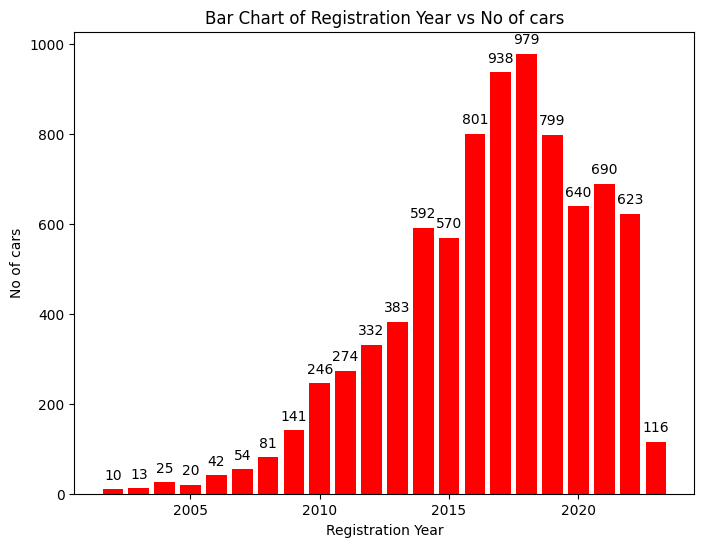

In [8]:
plt.figure(figsize=(8, 6))
car_counts_by_year = df.groupby('Registration Year')['centralVariantId'].count()
bars = plt.bar(car_counts_by_year.index, car_counts_by_year.values, color='red')
plt.bar_label(bars, fontsize=10, padding=5)
plt.xlabel("Registration Year")
plt.ylabel("No of cars")
plt.title(f'Bar Chart of Registration Year vs No of cars')
plt.show()

* Transmission vs no of cars

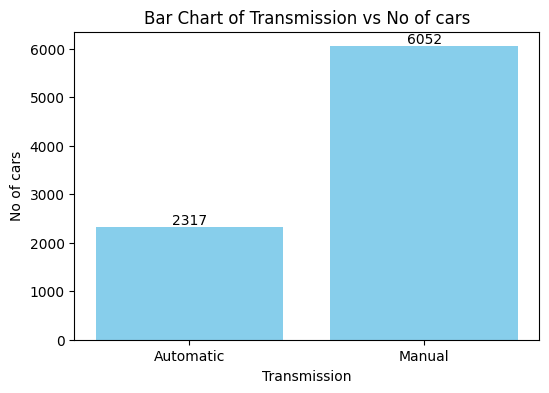

In [93]:
plt.figure(figsize=(6, 4))
car_counts_by_year = df.groupby('transmission')['transmission'].count()
bars = plt.bar(car_counts_by_year.index, car_counts_by_year.values, color='skyblue')
plt.bar_label(bars, fontsize=10, padding=0)
plt.xlabel("Transmission")
plt.ylabel("No of cars")
plt.title(f'Bar Chart of Transmission vs No of cars')
plt.show()

* no of cars in each fuel types

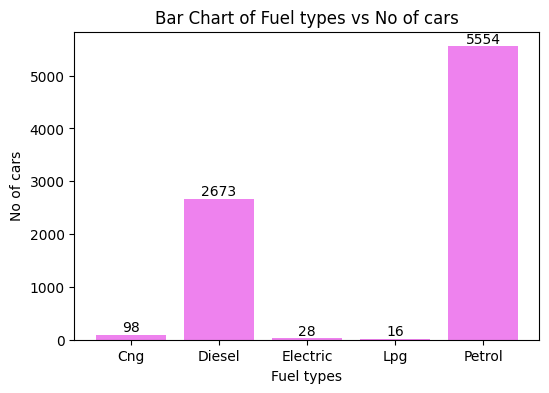

In [105]:
plt.figure(figsize=(6, 4))
car_counts_by_year = df.groupby('ft')['ft'].count()
bars = plt.bar(car_counts_by_year.index, car_counts_by_year.values, color='violet')
plt.bar_label(bars, fontsize=10, padding=0)
plt.xlabel("Fuel types")
plt.ylabel("No of cars")
plt.title(f'Bar Chart of Fuel types vs No of cars')
plt.show()

* average milage of each car body types

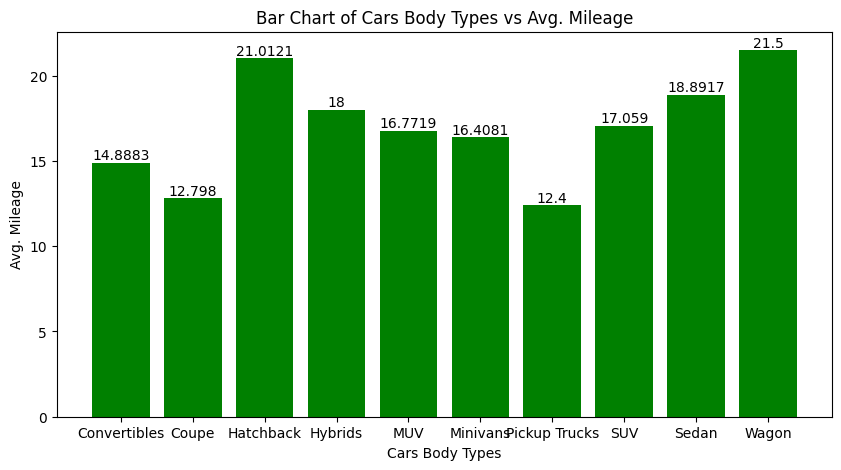

In [103]:
plt.figure(figsize=(10, 5))
car_counts_by_year = df.groupby('bt')['Mileage'].mean()
bars = plt.bar(car_counts_by_year.index, car_counts_by_year.values, color='green')
plt.bar_label(bars, fontsize=10, padding=0)
plt.xlabel("Cars Body Types")
plt.ylabel("Avg. Mileage")
plt.title(f'Bar Chart of Cars Body Types vs Avg. Mileage')
plt.show()

* no of cars and avg. car price in each city

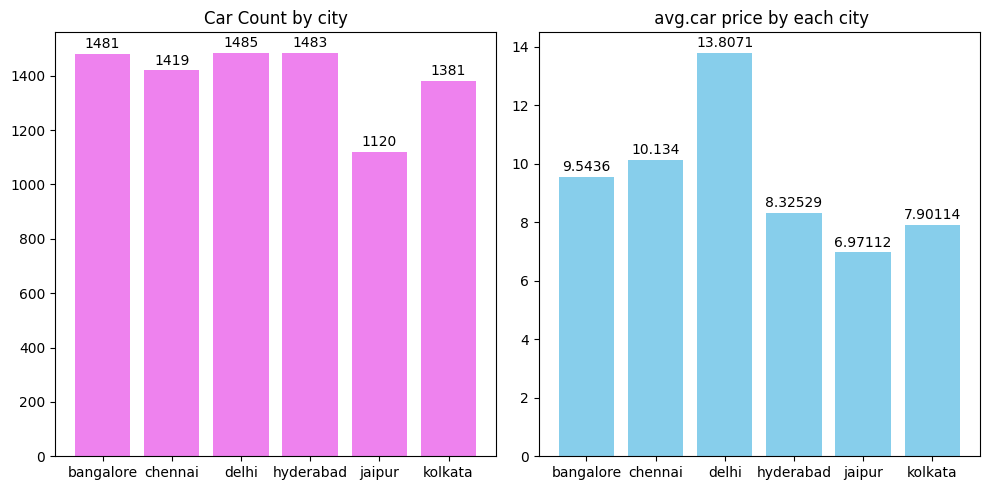

In [73]:
fig, axes = plt.subplots(1, 2,figsize=(10, 5))

plt1 = df.groupby('city')['city'].count()
bars = axes[0].bar(plt1.index, plt1.values, color='violet')
axes[0].set_title('Car Count by city')
axes[0].bar_label(bars, fontsize=10, padding=2)

plt2 = df.groupby('city')['price (lakh)'].mean()
bars = axes[1].bar(plt2.index, plt2.values, color='skyblue')
axes[1].set_title(' avg.car price by each city')
axes[1].bar_label(bars, fontsize=10, padding=2)

plt.tight_layout()
plt.show()


### Scatterplot

Text(0.5, 1.0, 'Mileage vs price')

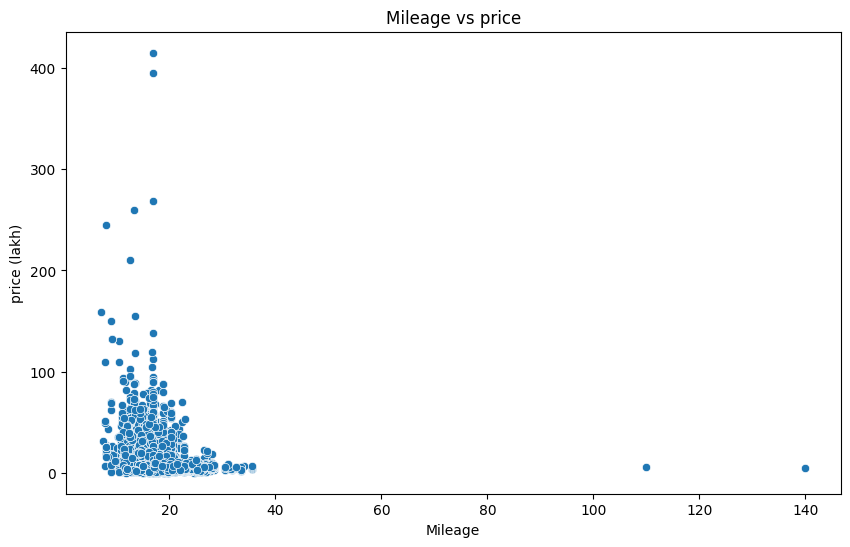

In [86]:
fig= plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage', y='price (lakh)', data=df)
plt.title('Mileage vs price')

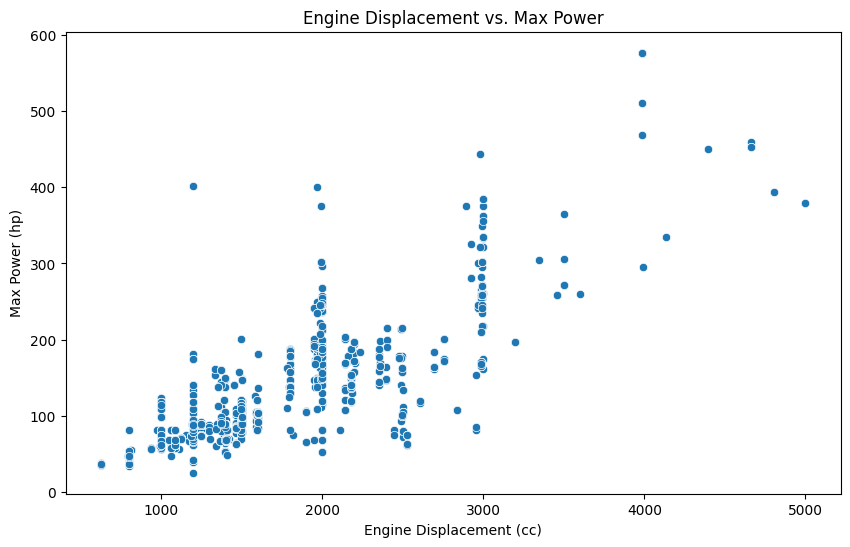

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Displacement', y='Max Power')
plt.title('Engine Displacement vs. Max Power')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Max Power (hp)')
plt.show()


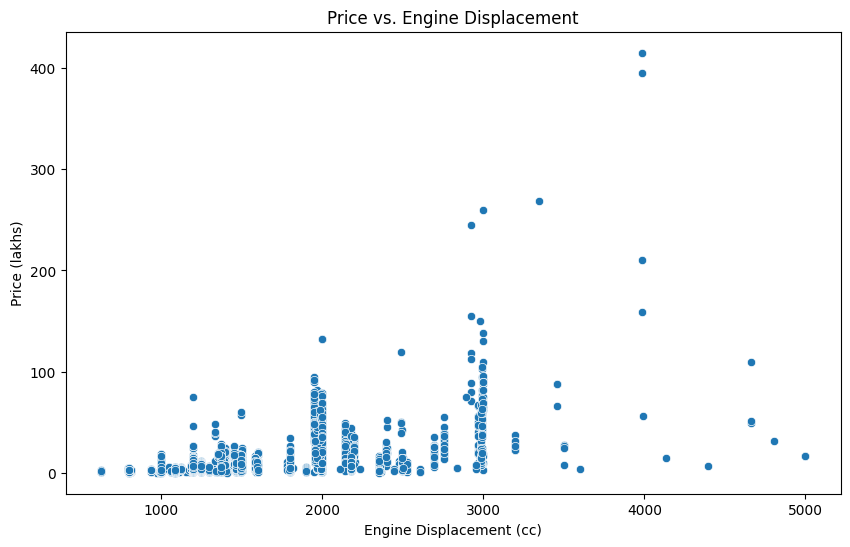

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Displacement', y='price (lakh)')
plt.title('Price vs. Engine Displacement')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Price (lakhs)')
plt.show()


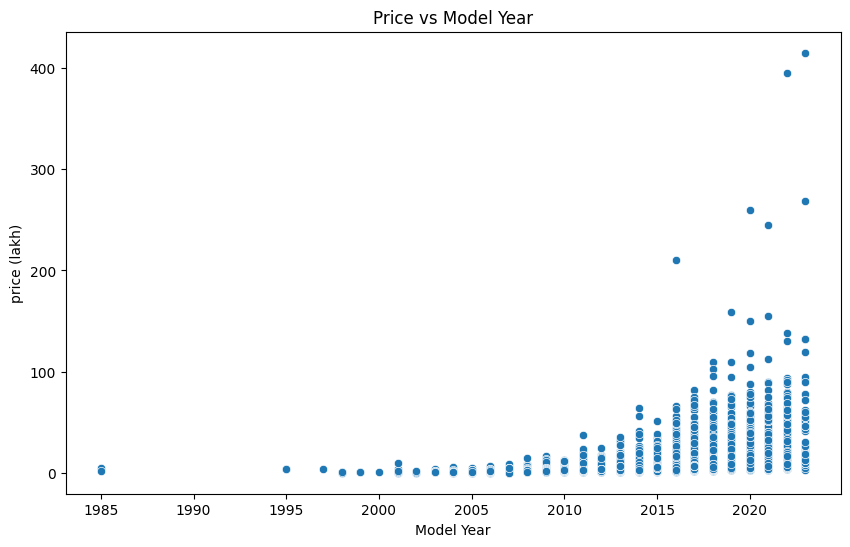

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='modelYear', y='price (lakh)')
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('price (lakh)')
plt.show()

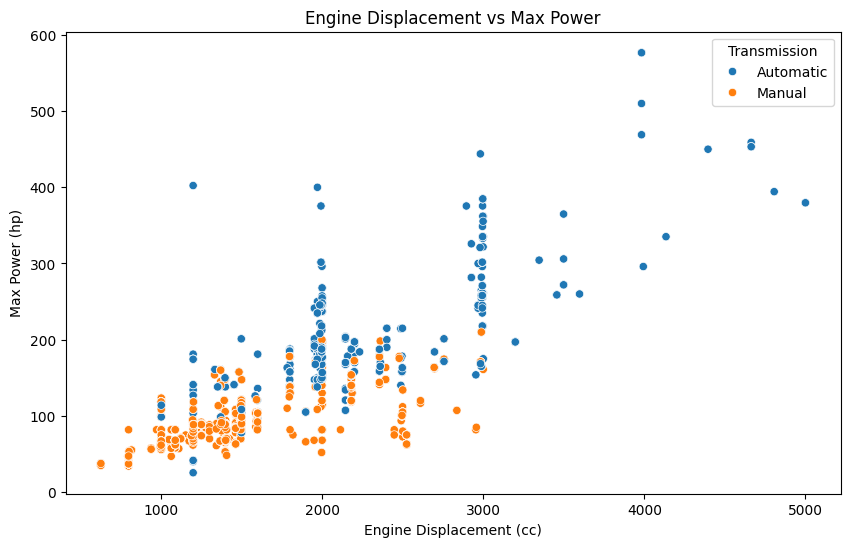

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Displacement', y='Max Power', hue='transmission')
plt.title('Engine Displacement vs Max Power')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Max Power (hp)')
plt.legend(title='Transmission')
plt.show()


Text(0.5, 1.0, 'km vs price')

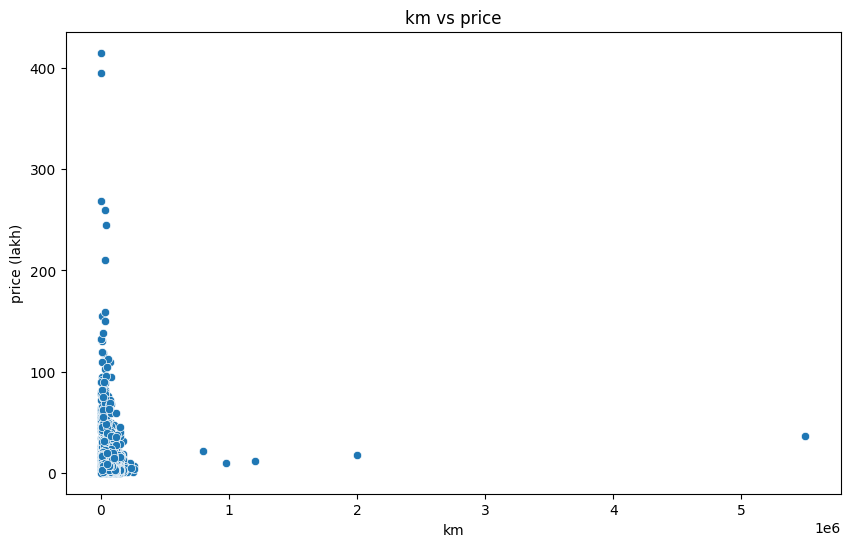

In [35]:
fig= plt.figure(figsize=(10,6))
sns.scatterplot(x='km', y='price (lakh)', data=df)
plt.title('km vs price')

In [76]:
df.columns

Index(['centralVariantId', 'ft', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'bt', 'model', 'modelYear', 'variantName', 'Engine Type',
       'price', 'city', 'Registration Year', 'Insurance Validity',
       'Engine Displacement', 'Max Power', 'Torque', 'No of Cylinder',
       'Mileage', 'Color', 'Seats', 'Length', 'Width', 'Height', 'Wheel Base',
       'Steering Type', 'Drive Type', 'Cargo Volumn', 'price (lakh)'],
      dtype='object')

### Histogram

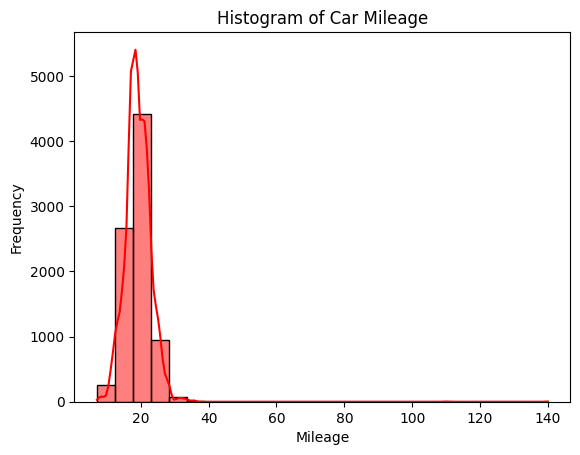

In [94]:
sns.histplot(df['Mileage'], bins=25, kde=True, color='red', edgecolor='black')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram of Car Mileage')
plt.show()

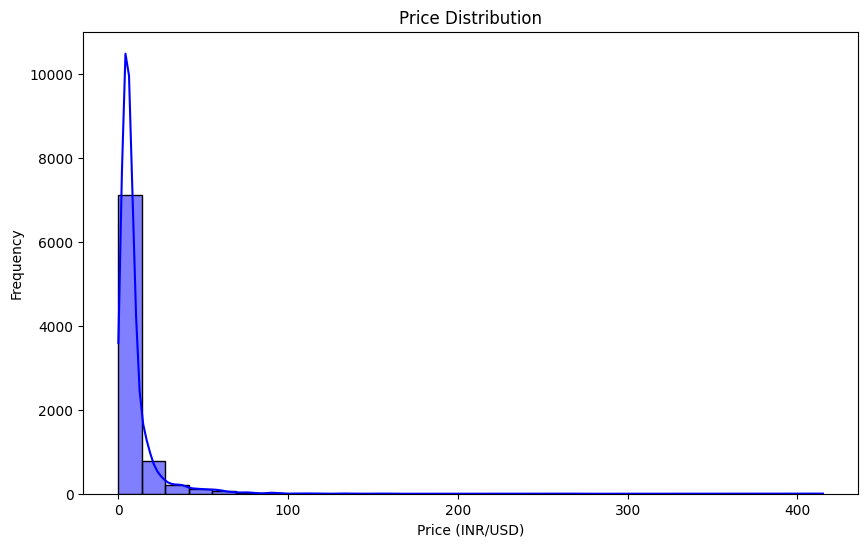

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price (lakh)'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (INR/USD)')
plt.ylabel('Frequency')
plt.show()


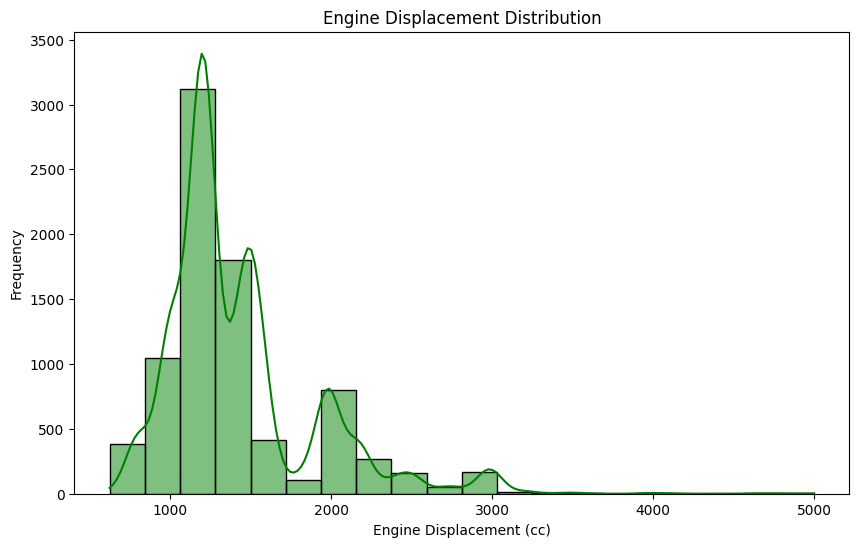

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Engine Displacement'], bins=20, kde=True, color='green')
plt.title('Engine Displacement Distribution')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Frequency')
plt.show()

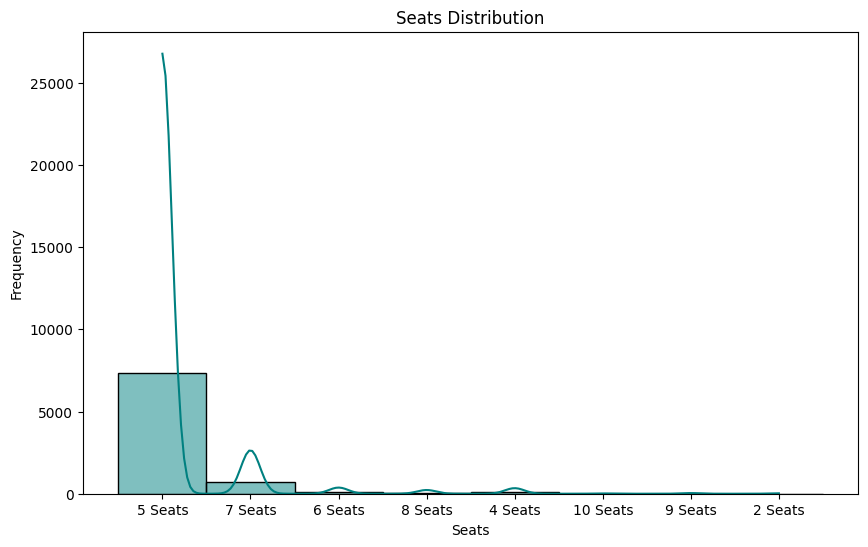

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Seats'], bins=10, kde=True, color='teal')
plt.title('Seats Distribution')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()


### box plot

In [101]:
df.columns

Index(['centralVariantId', 'ft', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'bt', 'model', 'modelYear', 'variantName', 'Engine Type',
       'price', 'city', 'Registration Year', 'Insurance Validity',
       'Engine Displacement', 'Max Power', 'Torque', 'No of Cylinder',
       'Mileage', 'Color', 'Seats', 'Length', 'Width', 'Height', 'Wheel Base',
       'Steering Type', 'Drive Type', 'Cargo Volumn', 'price (lakh)'],
      dtype='object')

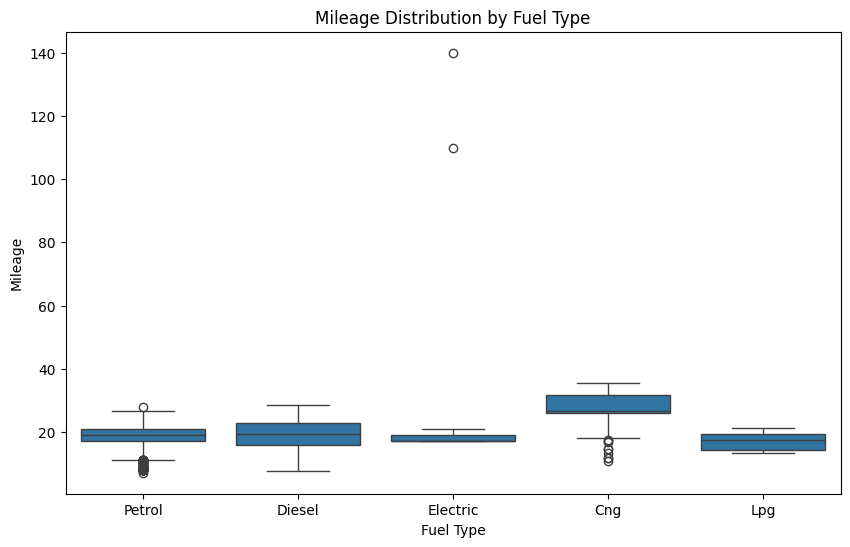

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ft', y='Mileage')
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()


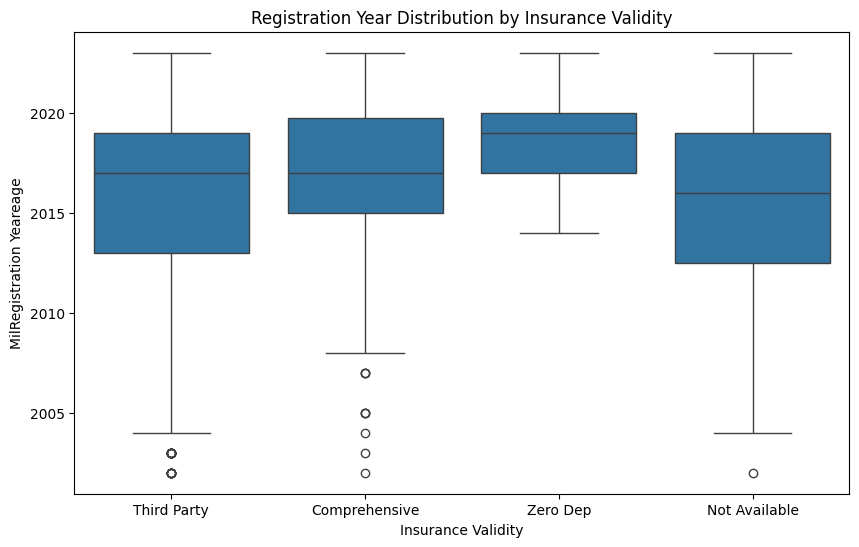

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Insurance Validity', y='Registration Year')
plt.title('Registration Year Distribution by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('MilRegistration Yeareage')
plt.show()

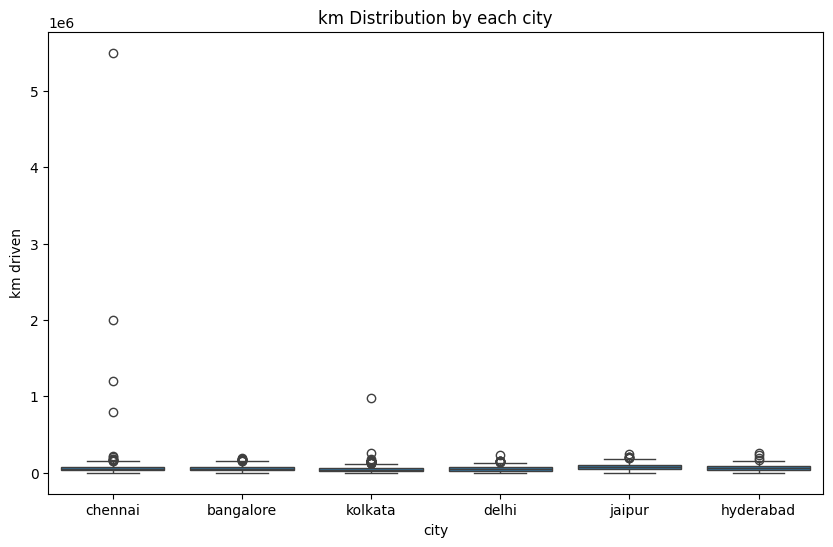

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='city', y='km')
plt.title('km Distribution by each city')
plt.xlabel('city')
plt.ylabel('km driven')
plt.show()

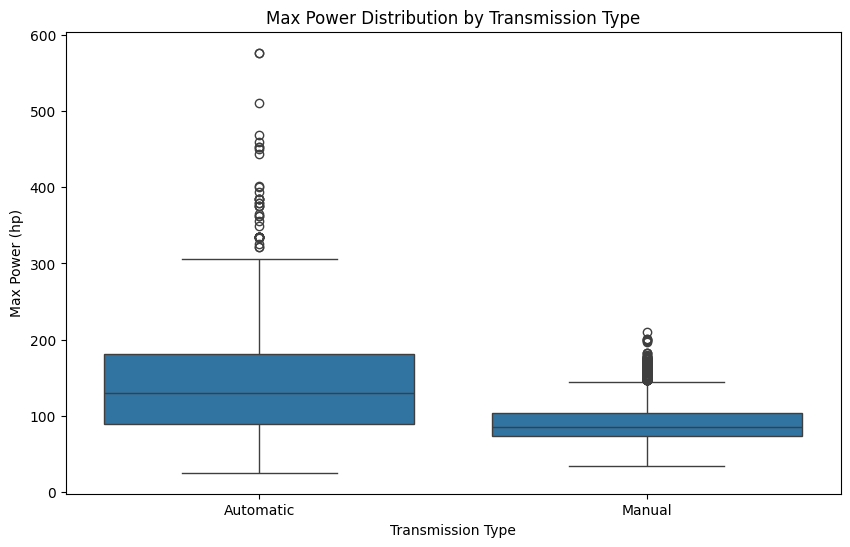

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='Max Power')
plt.title('Max Power Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Max Power (hp)')
plt.show()


### Heatmap for Correlation

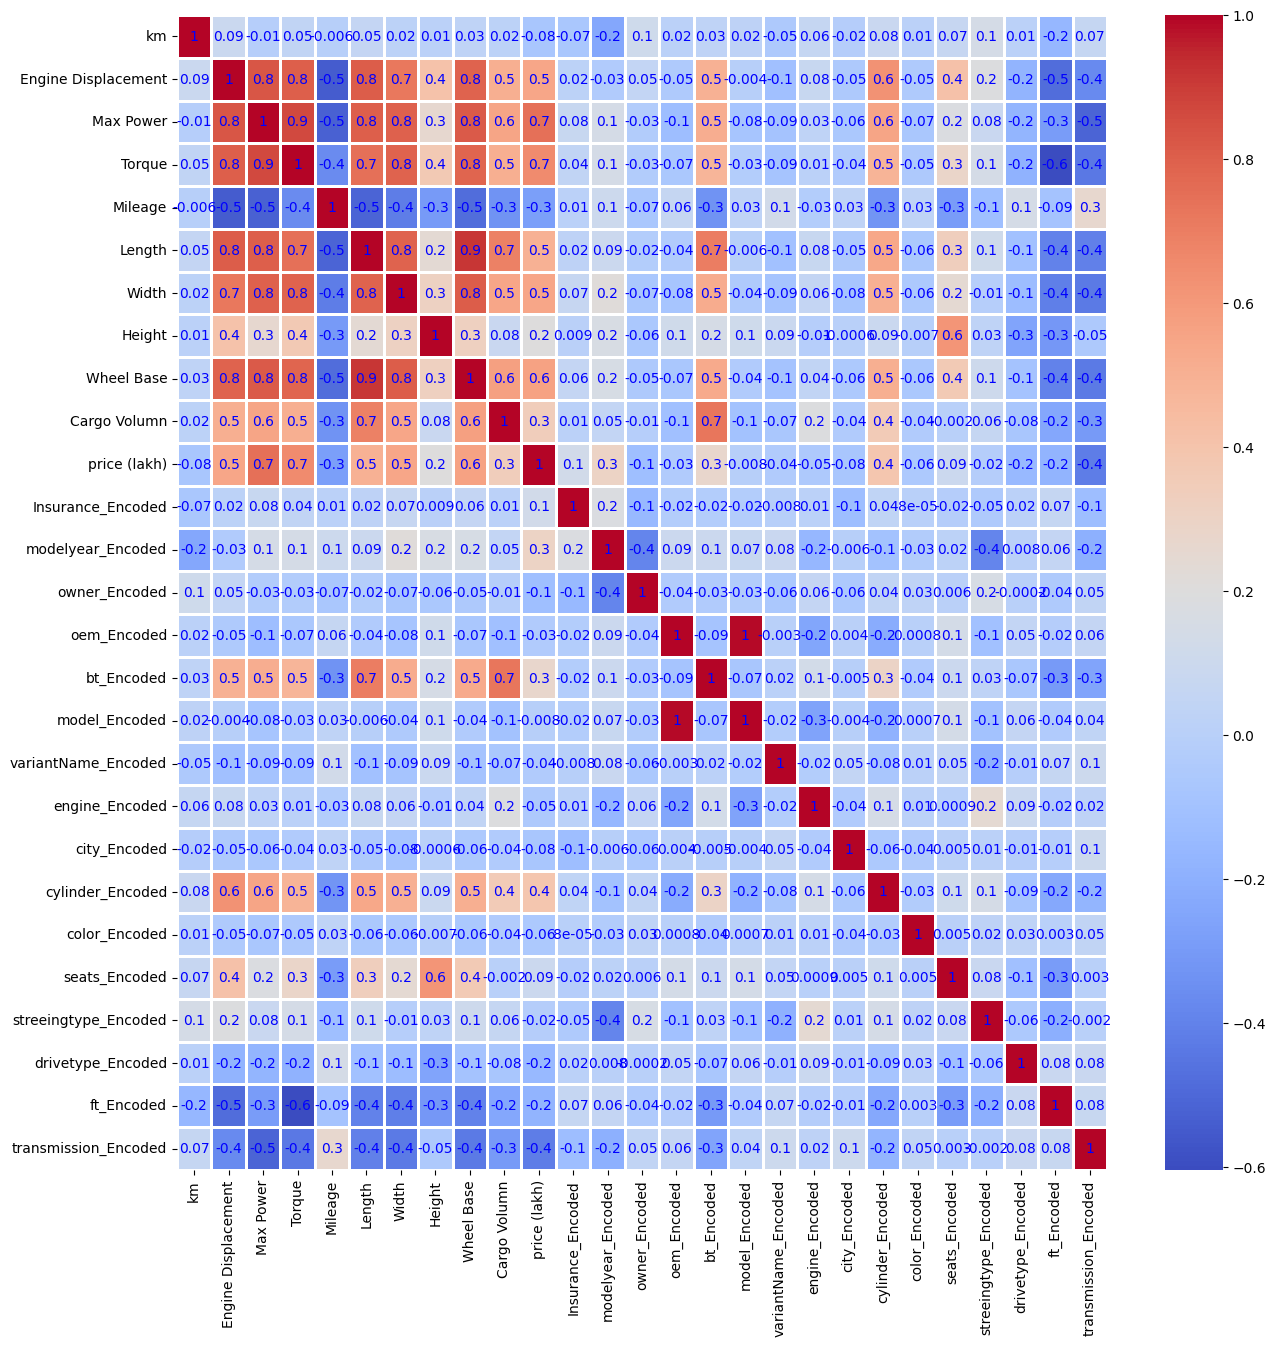

In [ ]:
plt.figure(figsize=(15,15))
data=df.drop(['ft', 'transmission', 'owner', 'oem', 'bt', 'model', 'modelYear',
       'variantName', 'Engine Type', 'city', 'Insurance Validity', 'No of Cylinder',
       'Color', 'Seats','Steering Type', 'Drive Type'], axis=1).corr()
sns.heatmap(data, annot=True, fmt=".1g",linewidths=1, linecolor="white",  cmap='coolwarm', annot_kws={"color": "blue"})
plt.show()

In [6]:
new_df=pd.read_csv("cardheko_encoded.csv")
new_df.drop(["Engine Displacement",'No of Cylinder','model_Encoded','variantName_Encoded','engine_Encoded','streeingtype_Encoded', 'drivetype_Encoded','Length', 'Width',
       'Cargo Volumn'],axis=1,inplace=True)

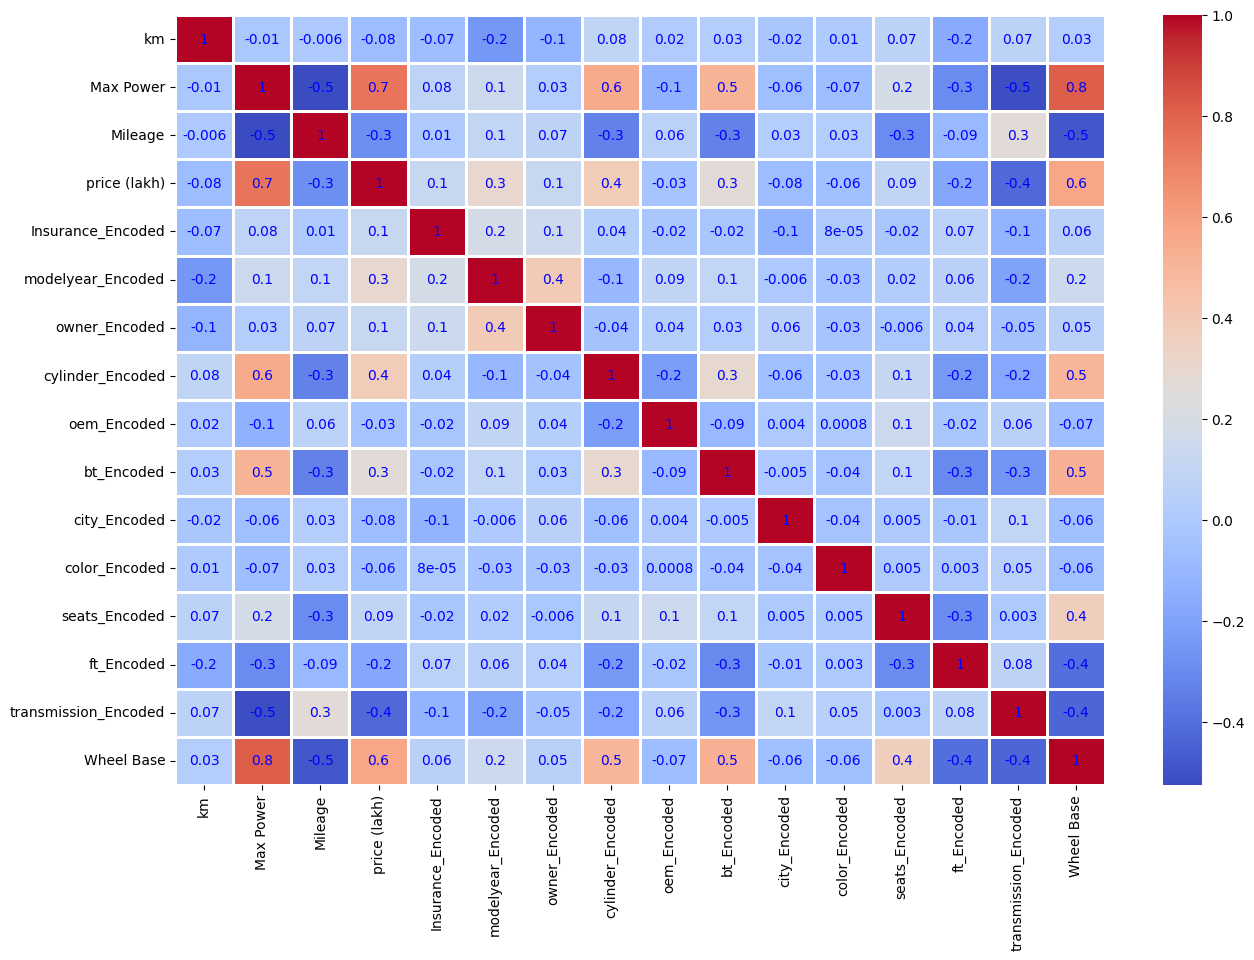

In [7]:
plt.figure(figsize=(15,10))
data=new_df.corr()
sns.heatmap(data, annot=True, fmt=".1g",linewidths=1, linecolor="white",  cmap='coolwarm', annot_kws={"color": "blue"})
plt.show()

In [130]:
corr_matrix=df.corr()
corr_with_target = corr_matrix['price (lakh)'].sort_values(ascending=False)
print(corr_with_target)

price (lakh)            1.000000
Max Power               0.600381
Wheel Base              0.585649
modelyear_Encoded       0.584773
bt_Encoded              0.424868
owner_Encoded           0.235966
cylinder_Encoded        0.181174
seats_Encoded           0.177758
Insurance_Encoded       0.106261
oem_Encoded            -0.003087
color_Encoded          -0.037181
city_Encoded           -0.130413
ft_Encoded             -0.179511
Mileage                -0.189768
km                     -0.243398
transmission_Encoded   -0.317623
Name: price (lakh), dtype: float64
